Import the Libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import to_categorical, plot_model


### Create image data generator object

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [25]:
test_datagen = ImageDataGenerator(rescale=1/255)

### Read the images

In [6]:
train = train_datagen.flow_from_directory('/home/pgdai/Desktop/March24-DAI-Workspace/CV-June24/dataset/fruits/training_set',
                                          target_size=(64, 64),
                                          class_mode='binary')

Found 13 images belonging to 2 classes.


In [7]:
train.filenames

['apple/1.jpg',
 'apple/2.jpeg',
 'apple/3.jpeg',
 'apple/4.jpeg',
 'apple/5.jpg',
 'apple/6.jpg',
 'apple/7.jpg',
 'orange/1.jpeg',
 'orange/2.jpg',
 'orange/3.jpeg',
 'orange/4.jpeg',
 'orange/5.jpg',
 'orange/6.jpg']

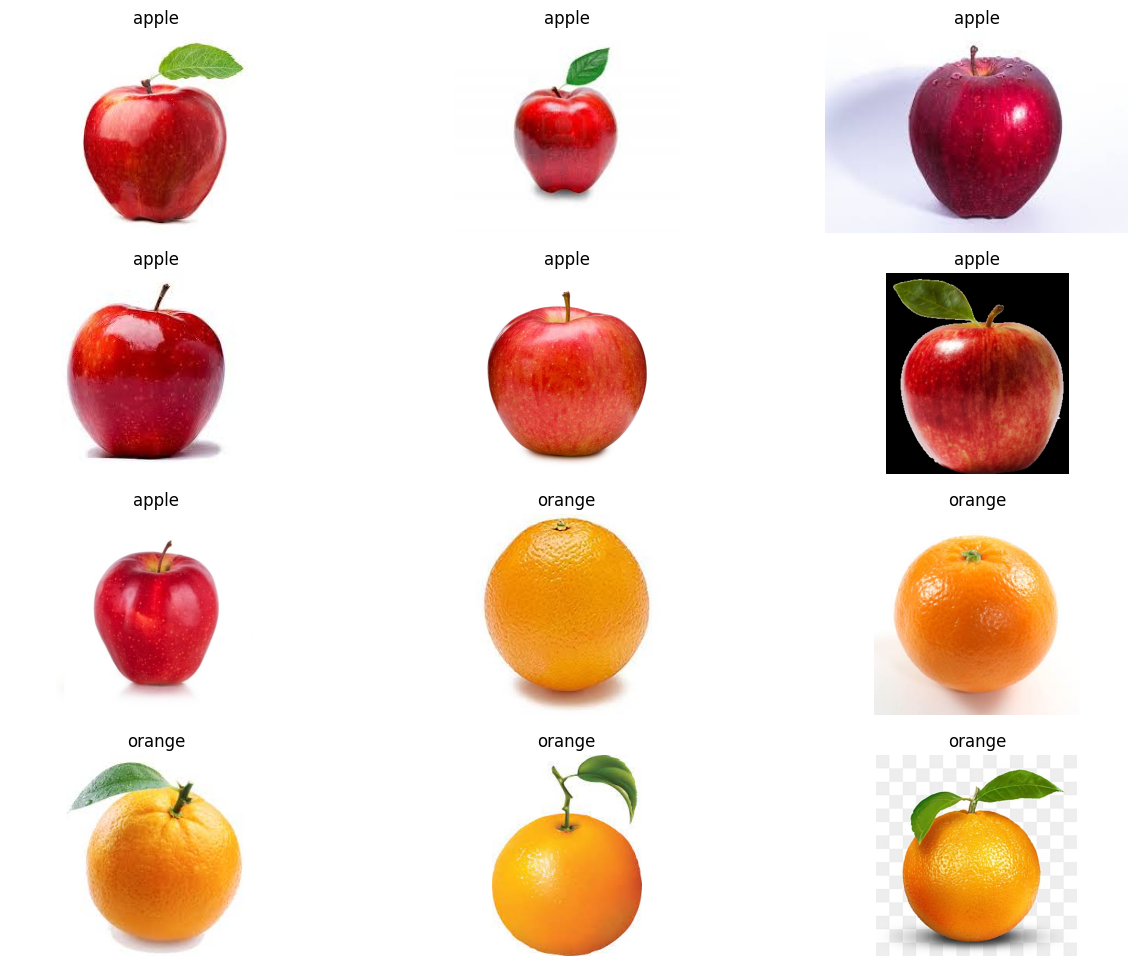

In [14]:
i = 1
plt.figure(figsize=(15,12))
for fname in train.filenames:
    if i == 13:
        break
    img = plt.imread(train.directory + "/"+fname)
    plt.subplot(4, 3, i)
    plt.axis('off')
    i += 1
    plt.title(fname.split('/')[0])
    plt.imshow(img)

In [26]:
test = test_datagen.flow_from_directory('/home/pgdai/Desktop/March24-DAI-Workspace/CV-June24/dataset/fruits/test_set',
                                          target_size=(64, 64),
                                          class_mode='binary')

Found 6 images belonging to 2 classes.


Build the CNN Model

In [34]:
model = Sequential()

# First Convolutional layer
model.add(Conv2D(filters=16, input_shape=(64,64,3), kernel_size=(3,3),
                 activation='relu'))

# First Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Second Convolutional layer
model.add(Conv2D(filters=8, kernel_size=(3,3),activation='relu'))

# Second Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_6 (Dense)             (None, 16)               

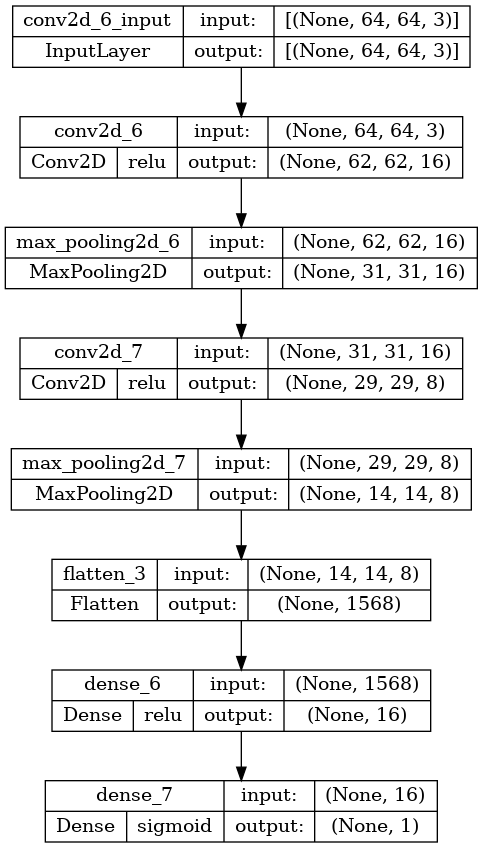

In [36]:
plot_model(model, show_layer_activations=True, show_layer_names=True, show_shapes=True)

Compile the model

In [37]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [38]:
train.class_indices

{'apple': 0, 'orange': 1}

Train the model

In [39]:
model.fit(train, epochs = 20, validation_data=test, )

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6961 - accuracy: 0.6667 - val_loss: 0.6517 - val_accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 0s 180ms/step - loss: 0.6517 - accuracy: 0.6667 - val_loss: 0.6231 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 146ms/step - loss: 0.6231 - accuracy: 0.6667 - val_loss: 0.5905 - val_accuracy: 0.8333
Epoch 4/20
1/1 [==============================] - 0s 176ms/step - loss: 0.5905 - accuracy: 0.8333 - val_loss: 0.5560 - val_accuracy: 0.8333
Epoch 5/20
1/1 [==============================] - 0s 178ms/step - loss: 0.5560 - accuracy: 0.8333 - val_loss: 0.5198 - val_accuracy: 0.8333
Epoch 6/20
1/1 [==============================] - 0s 172ms/step - loss: 0.5198 - accuracy: 0.8333 - val_loss: 0.4824 - val_accuracy: 0.8333
Epoch 7/20
1/1 [==============================] - 0s 151ms/step - loss: 0.4824 - accuracy: 0.8333 - val_loss: 0.4441 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=======

Predict the class of unseen Data

In [56]:
import cv2
img = plt.imread("/home/pgdai/Desktop/March24-DAI-Workspace/CV-June24/dataset/fruits/sample1.jpg")

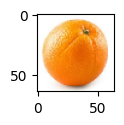

In [58]:
img = cv2.resize(img, (64,64))
plt.figure(figsize=(1,1))
plt.imshow(img)

In [54]:
img = img.reshape(1,64,64,3)
round(model.predict(img)[0][0],0)

1/1 [==============================] - 0s 24ms/step


1.0

In [52]:
train.class_indices

{'apple': 0, 'orange': 1}